In [15]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import  RandomForestClassifier
from sklearn.model_selection import  train_test_split
import pickle

df = pd.read_csv('card_transdata.csv')

X=np.array(df.iloc[:,:-1])
y=np.array(df.iloc[:,-1])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, random_state=42)

model =RandomForestClassifier(n_jobs=2,random_state=0)
model.fit(X_train,y_train)

pickle.dump(model,open("model.pkl","wb"))

In [4]:
df.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

In [5]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [2]:
df.tail()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0
999999,58.108125,0.318110,0.386920,1.0,1.0,0.0,1.0,0.0


In [6]:
print("Credit Card Fraud Detection data -  rows:",df.shape[0]," columns:",df.shape[1])

Credit Card Fraud Detection data -  rows: 1000000  columns: 8


In [14]:
y_pred_prob = model.predict_proba(X_test)[:, 1]

In [16]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=1)

In [17]:

# Compute the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
roc_auc

0.9999999985868351

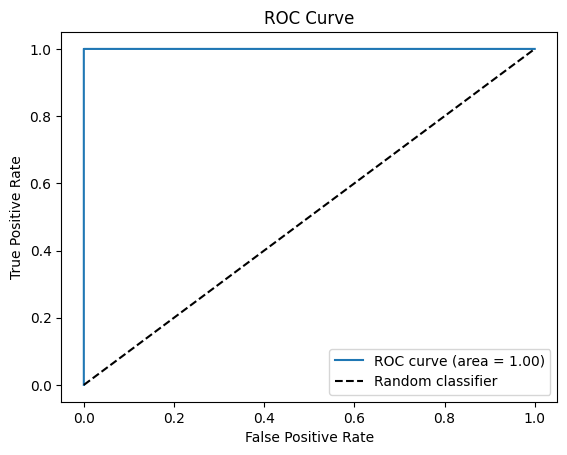

In [18]:

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
# roc curve for tpr = fpr 
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

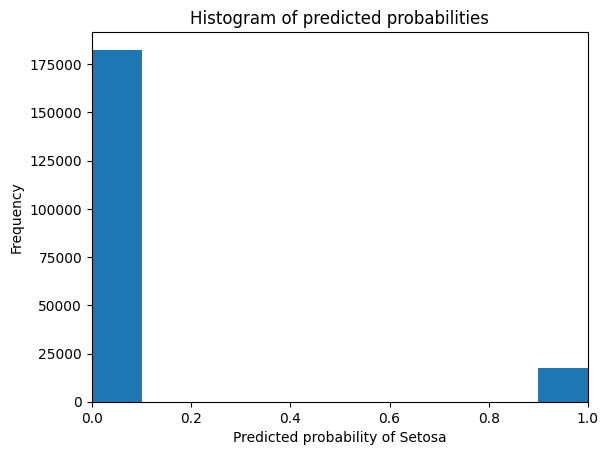

In [19]:
plt.hist(y_pred_prob, bins=10)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of Setosa')
plt.ylabel('Frequency')
plt.show()

In [12]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
y_pred_test = clf.predict(X_test)
print(y_pred_test)

[0. 0. 0. ... 1. 0. 0.]
